## Problem Set #[8]
MACS 30150, Dr. Evans

Linghui Wu

### Question 1

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import mean_squared_error

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

#### (a)

In [2]:
biden = pd.read_csv("biden.csv")
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [3]:
biden.isna().sum()

biden     0
female    0
age       0
educ      0
dem       0
rep       0
dtype: int64

In [4]:
y = biden["biden"].values
X = biden[["female", "age", "educ", "dem", "rep"]].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

biden_tree1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

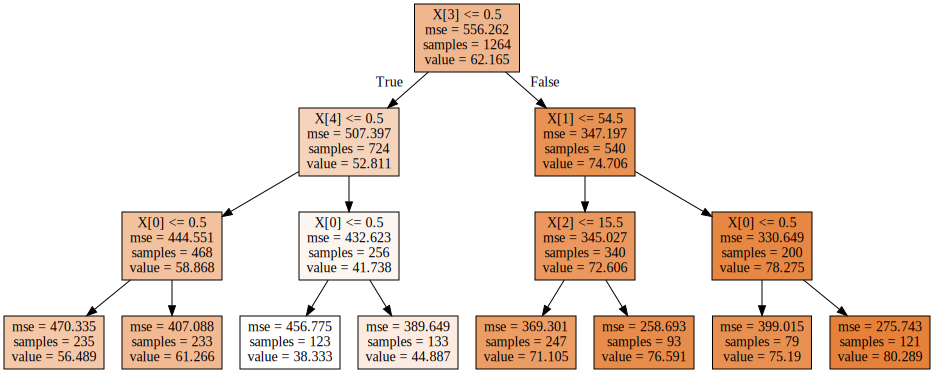

In [6]:
biden_tree1_viz = export_graphviz(
    biden_tree1,
    out_file=None,
    rounded=False,
    filled=True
)
graph = graphviz.Source(biden_tree1_viz)
graph.render("biden_tree1_viz")
graph

The result shows that the decision tree splits the predictors into eight terminals. The classificatin procedure is shown in the graph above. The first node is `dem`. Then the left branch is splited by `rep` and the right branch is splited by `age`. In the third layer, the four nodes are further divided by `female`, `female`, `educ` and `female`. The overall MSE of the test set is around 396.19. The most accurate prediction is on the the observations with `dem`=1, `age`<=54.5 and `educ` >= 15.5. 

In [7]:
y_pred = biden_tree1.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print("The test MSE is {}.".format(MSE1))

The test MSE is 396.1937146321307.


#### (b)

In [8]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [9]:
param_dist1 = {
    "max_depth": [3, 10],
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(2, 20)
}

In [10]:
biden_tree2 = DecisionTreeRegressor()
random_search1 = RandomizedSearchCV(
    biden_tree2,
    param_distributions=param_dist1,
    n_iter=100,
    n_jobs=-1,
    cv=5,
    random_state=25,
    scoring="neg_mean_squared_error"
)

The result of the training dataset is as follows:

In [11]:
result1 = random_search1.fit(X_train, y_train)
result1

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_dis

In [12]:
print("The optimal tuning parameter values is {}.".format(result1.best_params_))

The optimal tuning parameter values is {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 9}.


In [13]:
print("The MSE of the optimal result is {}.".format(-result1.best_score_))

The MSE of the optimal result is 404.7488359884144.


The result of the whole dataset is as follows:

In [14]:
result2 = random_search1.fit(X, y)
result2

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_dis

In [15]:
print("The optimal tuning parameter values is {}.".format(result2.best_params_))

The optimal tuning parameter values is {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}.


In [16]:
print("The MSE of the optimal result is {}.".format(-result2.best_score_))

The MSE of the optimal result is 401.6903602232667.


#### (c)

In [17]:
param_dist2 = {
    "n_estimators": [10, 200],
    "max_depth": [3, 10],
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(2, 20),
    "max_features": sp_randint(1, 5)
}

In [18]:
biden_tree3 = RandomForestRegressor()
random_search2 = RandomizedSearchCV(
    biden_tree3,
    param_distributions=param_dist2,
    n_iter=100,
    n_jobs=-1,
    cv=5,
    random_state=25,
    scoring="neg_mean_squared_error"
)

The result of the training dataset is as follows:

In [19]:
result3 = random_search2.fit(X_train, y_train)
result3

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [20]:
print("The optimal tuning parameter values is {}.".format(result3.best_params_))

The optimal tuning parameter values is {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 2, 'n_estimators': 200}.


In [21]:
print("The MSE of the optimal result is {}.".format(-result3.best_score_))

The MSE of the optimal result is 397.523140123435.


The result of the whole dataset is as follows:

In [22]:
result4 = random_search2.fit(X, y)
result4

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [23]:
print("The optimal tuning parameter values is {}.".format(result4.best_params_))

The optimal tuning parameter values is {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 17, 'min_samples_split': 12, 'n_estimators': 200}.


In [24]:
print("The MSE of the optimal result is {}.".format(-result4.best_score_))

The MSE of the optimal result is 397.09216645538623.


### Question 2

#### (a)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [26]:
auto = pd.read_csv("Auto.csv", na_values="?")
auto.dropna(inplace=True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [27]:
mask1 = auto["mpg"] >= auto["mpg"].median()
auto["mpg_high"] = np.where(mask1, 1, 0)

orig_mask1 = auto["origin"] == 1
auto["orgn1"] = np.where(orig_mask1, 1, 0)

orig_mask2 = auto["origin"] == 2
auto["orgn2"] = np.where(orig_mask2, 1, 0)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_high,orgn1,orgn2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,1,0


In [28]:
Xvars = auto[["cylinders", "displacement", "horsepower", 
          "weight", "acceleration", "year", "orgn1", "orgn2"]].values
yvars = auto["mpg_high"].values

In [29]:
k = 4
kf_log = KFold(n_splits=4, shuffle=True, random_state=25)
err_vec0 = np.zeros(k)
err_vec1 = np.zeros(k)
MSE_vec_kf = np.zeros(k)
kf_log.get_n_splits(Xvars)

N_loo = Xvars.shape[0]
y_test_arr = np.zeros(N_loo)
y_pred_arr = np.zeros(N_loo)

k_ind = int(0)
for train_index, test_index in kf_log.split(Xvars):
    print("k index is {}.".format(k_ind))
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    err_pred0 = np.sum((y_test == 0) & (y_test != y_pred)) / np.sum(y_test == 0)
    err_pred1 = np.sum((y_test == 1) & (y_test != y_pred)) / np.sum(y_test == 1)
    err_vec0[k_ind] = err_pred0
    err_vec1[k_ind] = err_pred1

    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    
    print("MSE of the test set", k_ind, "is {}.".format(MSE_vec_kf[k_ind]))
    print("Error rate of mpg_high=0 of the test set", k_ind, "is {}.".format(err_pred0))
    print("Error rate of mpg_high=1 of the test set", k_ind, "is {}.".format(err_pred1))
    
    k_ind += 1
    print("\n")

k index is 0.
MSE of the test set 0 is 0.14285714285714285.
Error rate of mpg_high=0 of the test set 0 is 0.13953488372093023.
Error rate of mpg_high=1 of the test set 0 is 0.14545454545454545.


k index is 1.
MSE of the test set 1 is 0.09183673469387756.
Error rate of mpg_high=0 of the test set 1 is 0.10526315789473684.
Error rate of mpg_high=1 of the test set 1 is 0.07317073170731707.


k index is 2.
MSE of the test set 2 is 0.07142857142857142.
Error rate of mpg_high=0 of the test set 2 is 0.09615384615384616.
Error rate of mpg_high=1 of the test set 2 is 0.043478260869565216.


k index is 3.
MSE of the test set 3 is 0.08163265306122448.
Error rate of mpg_high=0 of the test set 3 is 0.11363636363636363.
Error rate of mpg_high=1 of the test set 3 is 0.05555555555555555.




In [30]:
MSE_kf = MSE_vec_kf.mean()
err_0 = err_vec0.mean()
err_1 = err_vec1.mean()
print("The MSE of the model is {}.".format(MSE_kf))
print("The error rate of mpg_high=0 of the model is {}.".format(err_0))
print("The error rate of mpg_high=1 of the model is {}.".format(err_1))

The MSE of the model is 0.09693877551020408.
The error rate of mpg_high=0 of the model is 0.11364706285146922.
The error rate of mpg_high=1 of the model is 0.07941477339674582.


#### (b)

In [31]:
param_dist3 = {
    "n_estimators": [10, 200],
    "max_depth": [3, 8],
    "min_samples_split": sp_randint(2, 20),
    "min_samples_leaf": sp_randint(2, 20),
    "max_features": sp_randint(1, 8)
}

In [32]:
auto_tree = RandomForestRegressor()
random_search3 = RandomizedSearchCV(
    auto_tree,
    param_distributions=param_dist3,
    n_iter=100,
    n_jobs=-1,
    cv=4,
    random_state=25,
    scoring="neg_mean_squared_error"
)

The result of the whole dataset is as follows:

In [33]:
result5 = random_search3.fit(Xvars, yvars)
result5

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [34]:
print("The optimal tuning parameter values is {}.".format(result5.best_params_))

The optimal tuning parameter values is {'max_depth': 8, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10}.


In [35]:
print("The MSE of the optimal result is {}.".format(-result5.best_score_))

The MSE of the optimal result is 0.09389724217883406.


#### (c)

In [36]:
from sklearn.svm import SVC
from scipy.stats import uniform as sp_uniform

In [37]:
param_dist4 = {
    "C": sp_uniform(loc=0.2, scale=4.0),
    "gamma": ["scale", "auto"],
    "shrinking": [True, False]
}

In [38]:
auto_svc = SVC(kernel="rbf")
random_search4 = RandomizedSearchCV(
    auto_svc,
    param_distributions=param_dist4,
    n_iter=100,
    n_jobs=-1,
    cv=4,
    random_state=25,
    scoring="neg_mean_squared_error"
)

The result of the whole dataset is as follows:

In [39]:
result6 = random_search4.fit(Xvars, yvars)
result6

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a22d6bcd0>,
                                        'gamma': ['scale', 'auto'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=25, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [40]:
print("The optimal tuning parameter values is {}.".format(result6.best_params_))

The optimal tuning parameter values is {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}.


In [41]:
print("The MSE of the optimal result is {}.".format(-result6.best_score_))

The MSE of the optimal result is 0.11989795918367346.


#### (d)

In [42]:
print("MSE of logistic regression model: ", MSE_kf)
print("MSE of random forest classifier: ", -result5.best_score_)
print("MSE of support vector machine: ", -result6.best_score_)

MSE of logistic regression model:  0.09693877551020408
MSE of random forest classifier:  0.09389724217883406
MSE of support vector machine:  0.11989795918367346


According to the MSE statistics above, the **random forest classifier** is the best predictor of `mpg_high` since the model has the smallest MSE.